In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\capnp\OneDrive\Desktop\cleveland_heart_disease\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [6]:
data.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

# Exploratory Data Analysis

## 1. Correlating everything with Target Variable

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

sns.catplot(x="target", y="age", data=data)

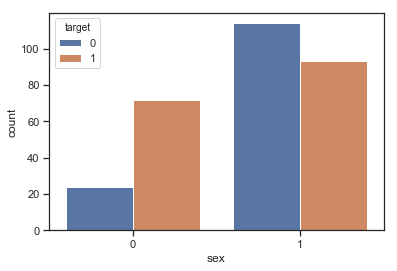

In [8]:
sns.countplot(x="sex", hue="target", data=data)

#### Interesting Find:
Women died more than men

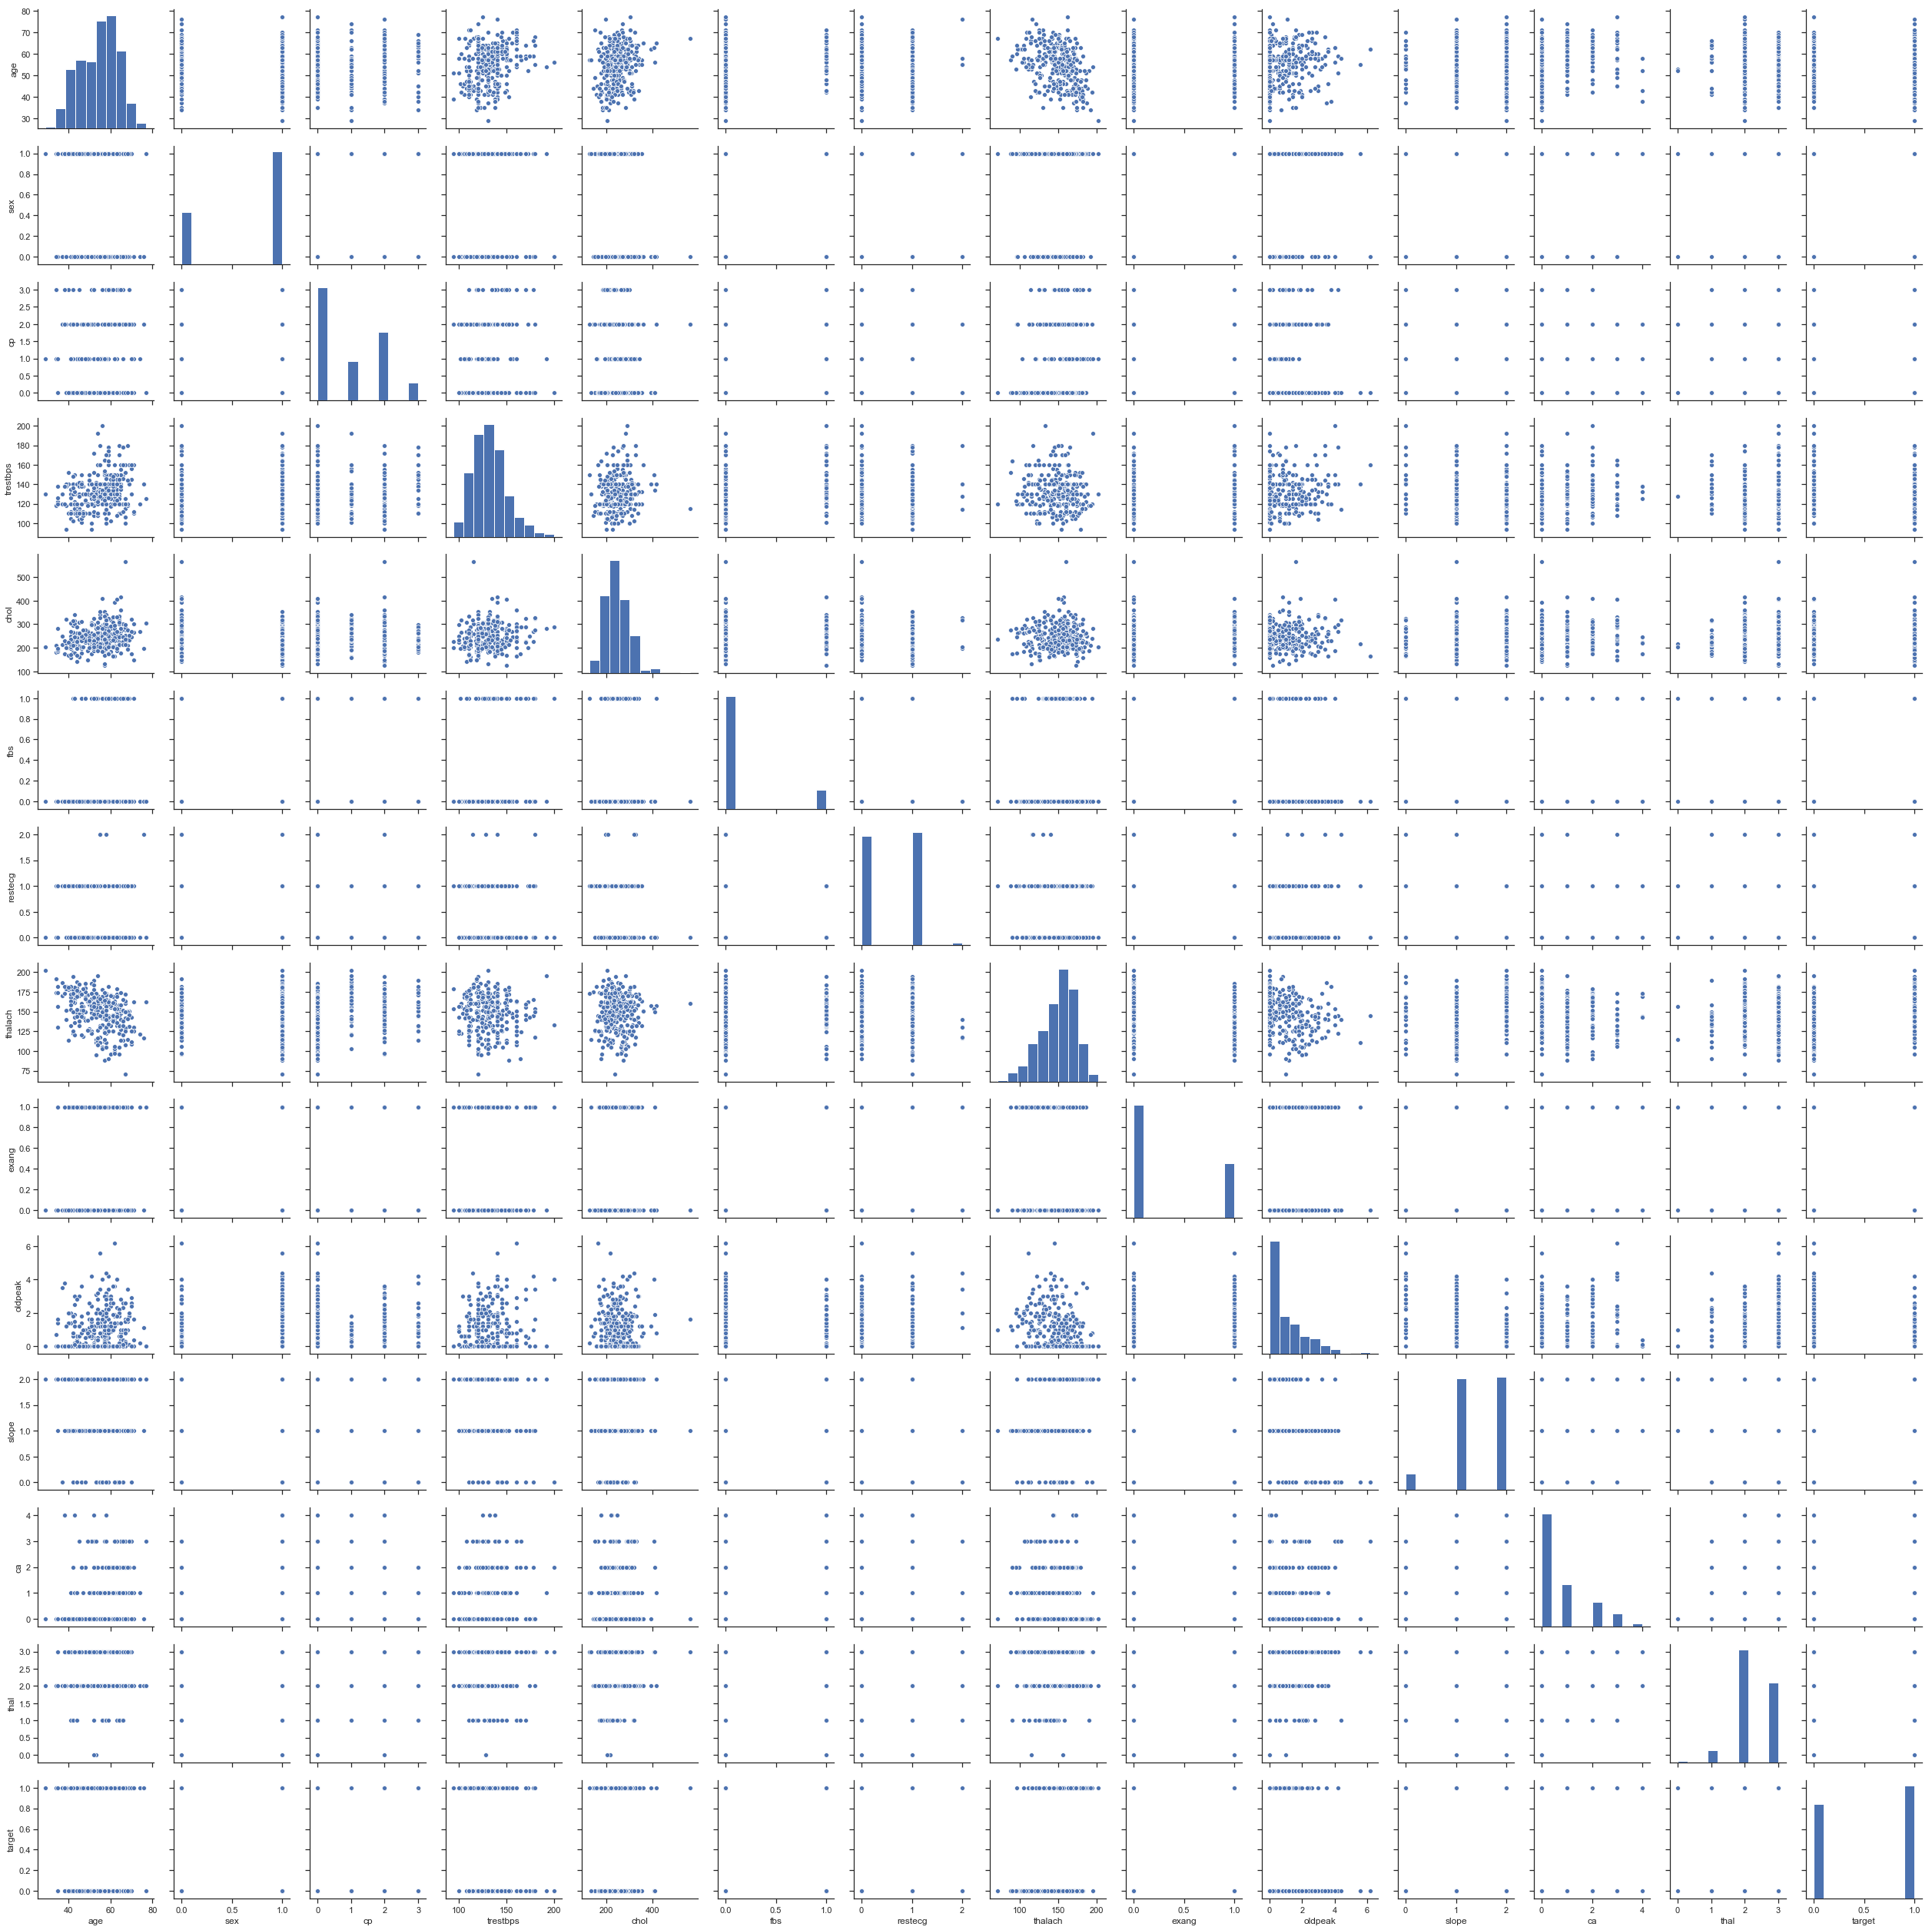

In [9]:
sns.pairplot(data)

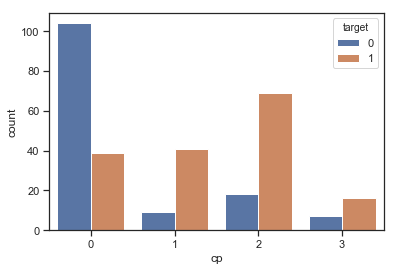

In [10]:
sns.countplot(x="cp", hue="target", data=data)

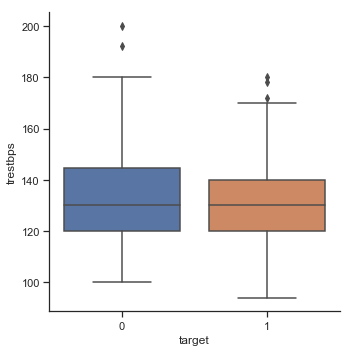

In [11]:
sns.catplot(x="target", y="trestbps", kind ="box", data=data)

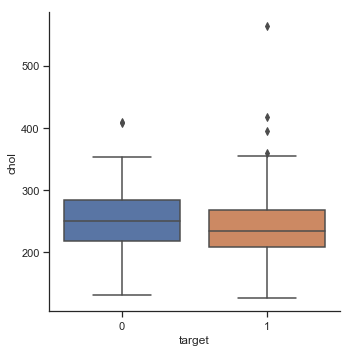

In [12]:
sns.catplot(x="target", y="chol", kind ="box", data=data)

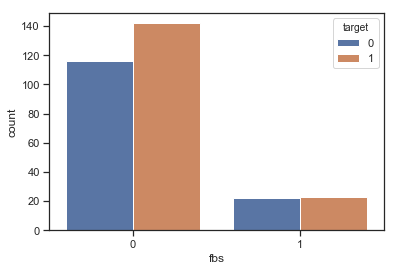

In [13]:
sns.countplot(x="fbs", hue="target", data=data)

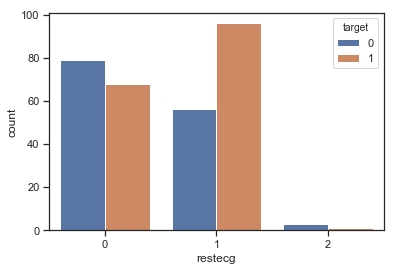

In [14]:
sns.countplot(x="restecg", hue="target", data=data)

#### Interesting Find:
Patients who had very high resting ecg results died more and the ones who had very high died less.

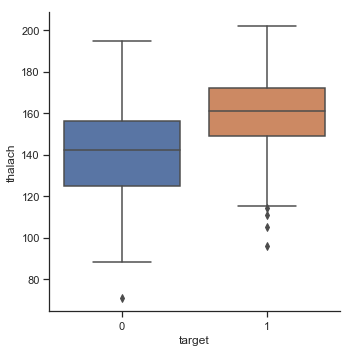

In [15]:
sns.catplot(x="target", y="thalach", kind ="box", data=data)

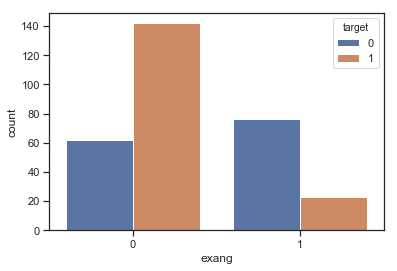

In [16]:
sns.countplot(x="exang", hue="target", data=data)

#### Interesting Find:
Patients who didn't suffer from exercise induced angina faced fatal outcomes

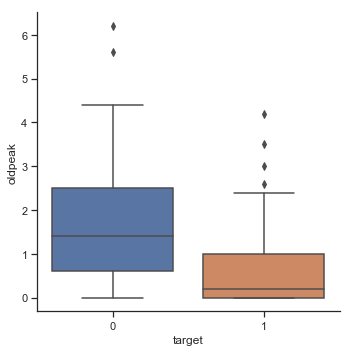

In [17]:
sns.catplot(x="target", y="oldpeak", kind ="box", data=data)

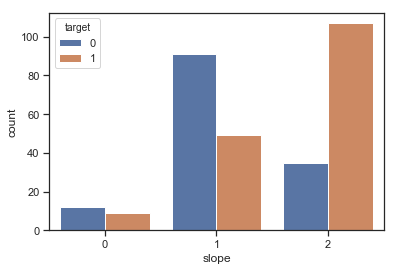

In [18]:
sns.countplot(x="slope", hue="target", data=data)

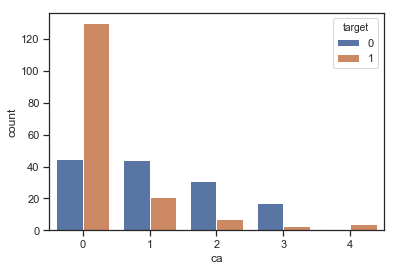

In [19]:
sns.countplot(x="ca", hue="target", data=data)

#### Interesting Find: 
The patients with unmarked blood vessels died more, might be because of an unreliable fluoroscopy machine. Also there are not many people with marked vessels either  

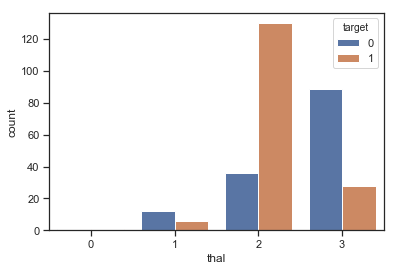

In [20]:
sns.countplot(x="thal", hue="target", data=data)

## 2. Correlating every variable with possible interfering vaiables 

### - Analysing age

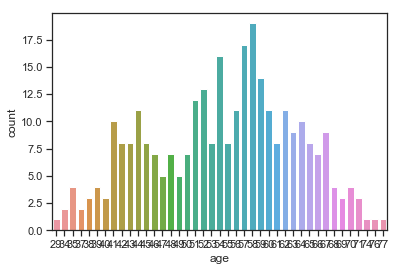

In [21]:
sns.countplot(x='age', data=data)

In [22]:
data['age_cat'] = pd.cut(data['age'], [29, 40, 55, 100], labels=['young', 'middle-age', 'old-age'])
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,old-age
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,young
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,middle-age
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,old-age
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,old-age


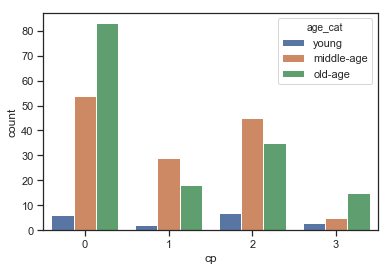

In [23]:
sns.countplot(x="cp", hue="age_cat", data=data)

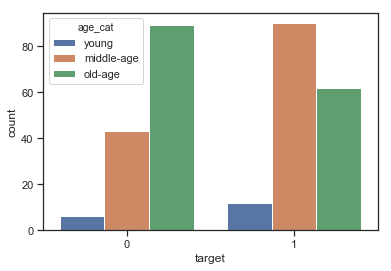

In [30]:
sns.countplot(x="target", hue="age_cat", data=data)

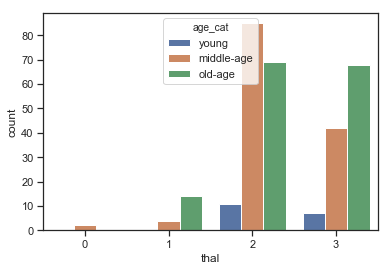

In [24]:
sns.countplot(x="thal", hue="age_cat", data=data)

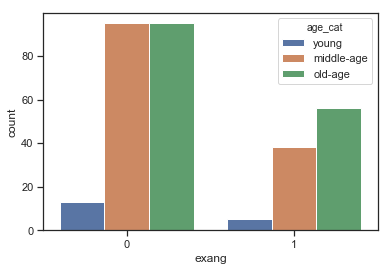

In [25]:
sns.countplot(x="exang", hue="age_cat", data=data)

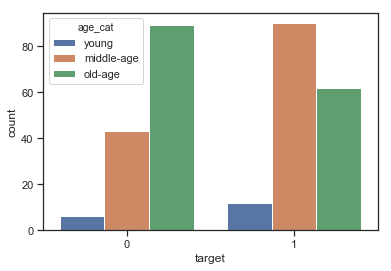

In [26]:
sns.countplot(x="target", hue="age_cat", data=data)

People with ages between 40-55 died the most  

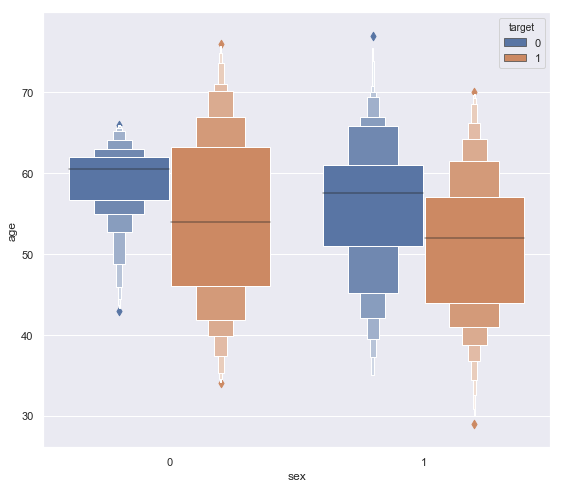

In [50]:
with sns.axes_style("darkgrid"):
    fig,ax=plt.subplots(figsize=(20,8))
    plt.subplot(121)
    sns.boxenplot(x="sex", y="age", hue="target", data=data)

### -Analysing Chest Pain Level

In [27]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,old-age
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,young
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,middle-age
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,old-age
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,old-age


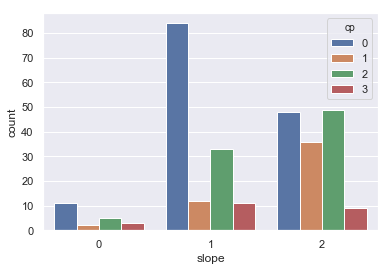

In [52]:
with sns.axes_style("darkgrid"):
    sns.countplot(x="slope", hue="cp", data=data)

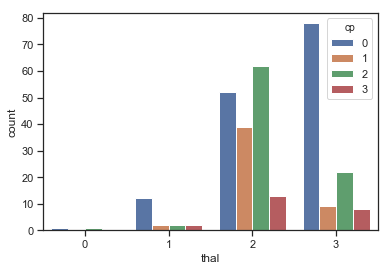

In [31]:
sns.countplot(x="thal", hue="cp", data=data)

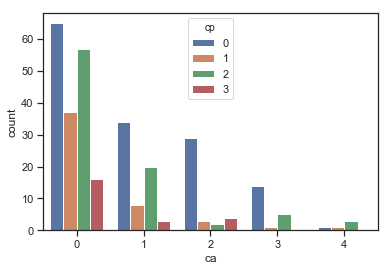

In [32]:
sns.countplot(x="ca", hue="cp", data=data)

### -Analysing Blood Sugar

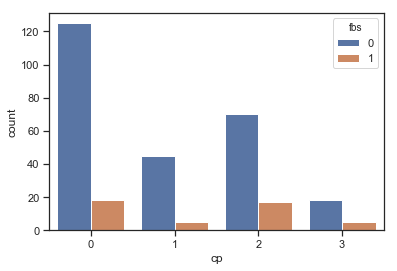

In [33]:
sns.countplot(x="cp", hue="fbs", data=data)

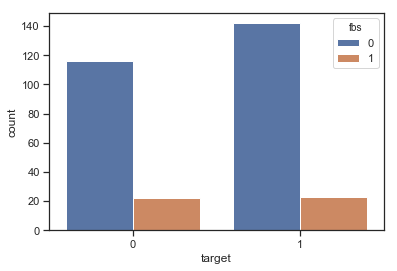

In [34]:
sns.countplot(x="target", hue="fbs", data=data)

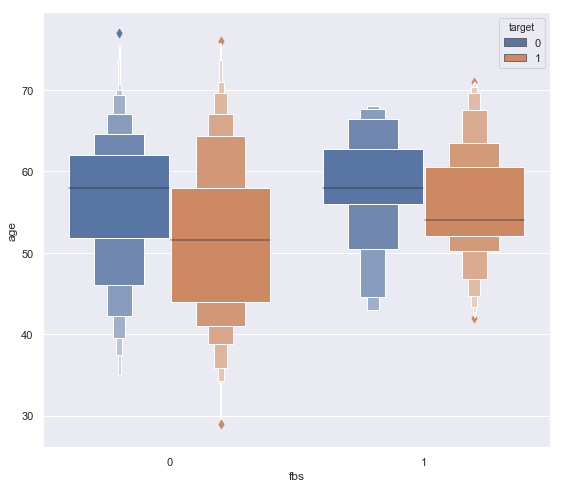

In [53]:
with sns.axes_style("darkgrid"):
    fig,ax=plt.subplots(figsize=(20,8))
    plt.subplot(121)
    sns.boxenplot(x="fbs", y="age", hue="target", data=data)

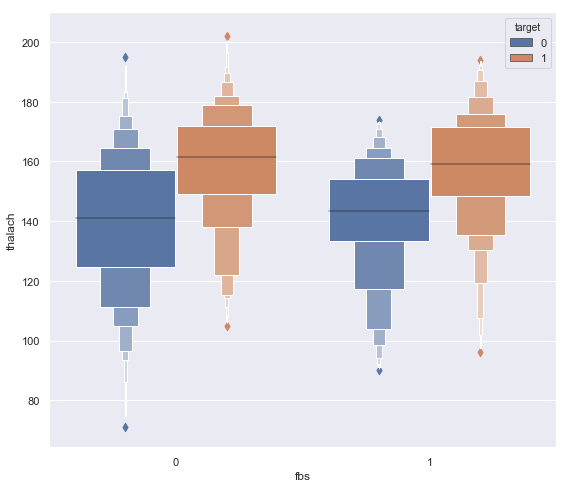

In [56]:
fig,ax=plt.subplots(figsize=(20,8))
plt.subplot(121)
sns.boxenplot(x="fbs", y="thalach", hue="target", data=data)

### -Analysing Thalassemia Defects

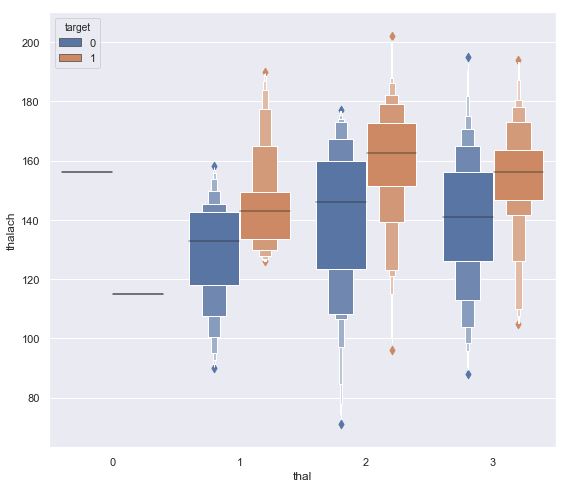

In [64]:
fig,ax=plt.subplots(figsize=(20,8))
plt.subplot(121)
sns.boxenplot(x="thal", y="thalach", hue="target", data=data)

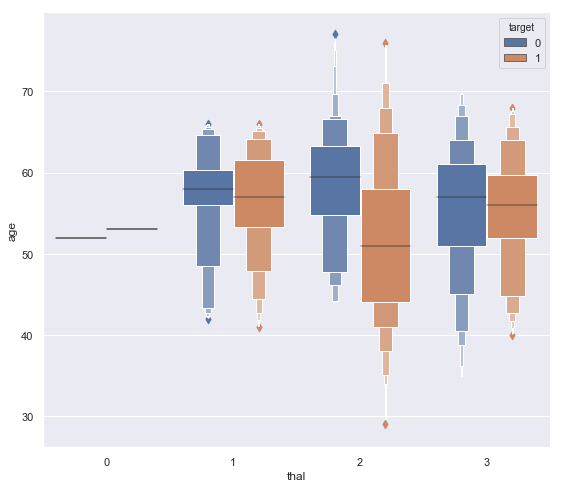

In [65]:
fig,ax=plt.subplots(figsize=(20,8))
plt.subplot(121)
sns.boxenplot(x="thal", y="age", hue="target", data=data)

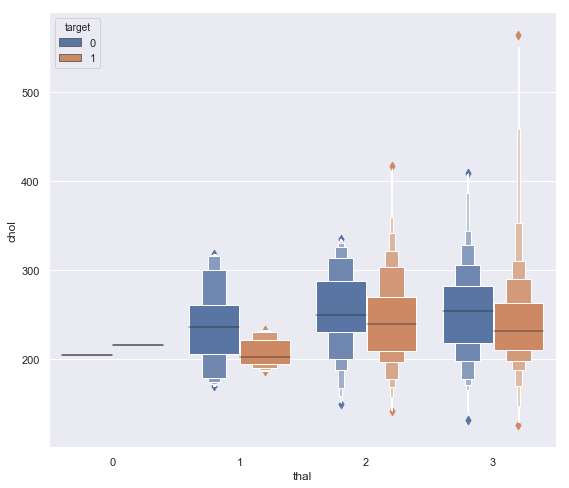

In [67]:
fig,ax=plt.subplots(figsize=(20,8))
plt.subplot(121)
sns.boxenplot(x="thal", y="chol", hue="target", data=data)

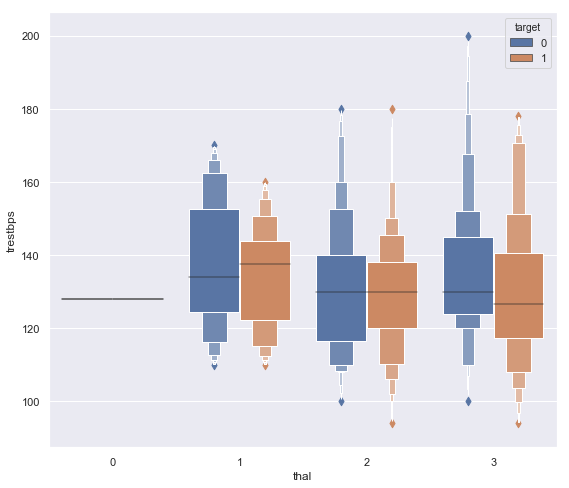

In [68]:
fig,ax=plt.subplots(figsize=(20,8))
plt.subplot(121)
sns.boxenplot(x="thal", y="trestbps", hue="target", data=data)

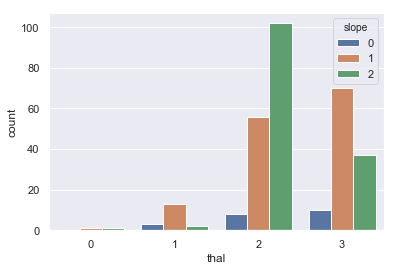

In [79]:
plt.subplot(111)
sns.countplot(x="thal", hue="slope", data=data)

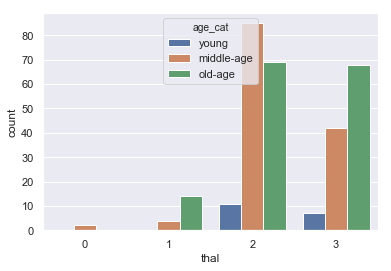

In [83]:
sns.countplot(x="thal", hue="age_cat", data=data)

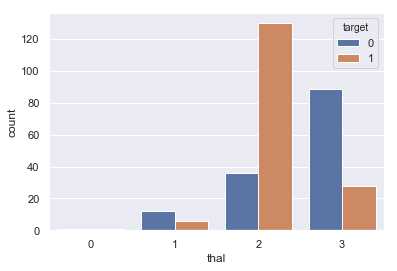

In [84]:
sns.countplot(x="thal", hue="target", data=data)

## Modelling

In [89]:
x = data.drop(['age', 'target'], axis = 1)
x.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_cat
0,1,3,145,233,1,0,150,0,2.3,0,0,1,old-age
1,1,2,130,250,0,1,187,0,3.5,0,0,2,young
2,0,1,130,204,0,0,172,0,1.4,2,0,2,middle-age
3,1,1,120,236,0,1,178,0,0.8,2,0,2,old-age
4,0,0,120,354,0,1,163,1,0.6,2,0,2,old-age


In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['age_cat'] = le.fit_transform(x['age_cat'])

In [99]:
y = data['target']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0) 

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gaussian Naive Bayes :',GaussianNB()]]

cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))

Logistic Regression : 0.8552631578947368
Decision Tree Classification : 0.8289473684210527
Random Forest Classification : 0.7894736842105263
Gradient Boosting Classification : 0.8289473684210527
Ada Boosting Classification : 0.868421052631579
Extra Tree Classification : 0.8026315789473685
K-Neighbors Classification : 0.618421052631579
Support Vector Classification : 0.5526315789473685
Gaussian Naive Bayes : 0.8552631578947368


C:\Users\capnp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\capnp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\capnp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\capnp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Thus, Best Classifier: Ada Boosting Classifier with 86% accuracy!